#### Loading Python Packages

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import joblib

#### Loading the Dataset

In [2]:
data = pd.read_csv(r'../Dataset/Emotion Dataset.csv')
data.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


#### Displaying the total number of rows and columns in the dataset

In [3]:
print(f'Total number of rows : {data.shape[0]}')
print(f'Total number of columns : {data.shape[1]}')

Total number of rows : 34792
Total number of columns : 2


#### Displaying the complete information about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


#### Displaying the complete statistical information about the dataset

In [5]:
data.describe(include='all')

,Emotion,Text
count,34792,34792
unique,8,31104
top,joy,Yes .
freq,11045,76


#### Calculating the number of null values in the dataset

In [6]:
data.isnull().sum()

Emotion    0
Text       0
dtype: int64

#### Calculating the number of duplicates present inside the dataset

In [7]:
print(data.duplicated().sum())

3631


#### Displaying the value counts of each emotion

In [8]:
data['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

#### Plotting the countplot for different types of emotions

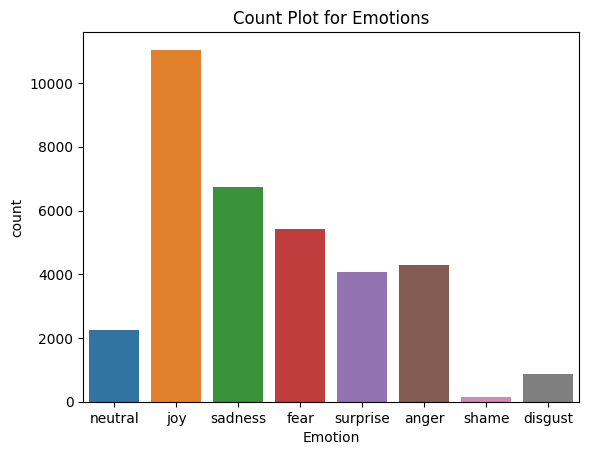

In [9]:
sns.countplot(data=data,x='Emotion',hue='Emotion')
plt.title('Count Plot for Emotions')
plt.show()

#### Removing the User Handles

In [10]:
data['Clean_Text'] = data['Text'].apply(nfx.remove_userhandles)

#### Removing the stopwords

In [11]:
data['Clean_Text'] = data['Text'].apply(nfx.remove_stopwords)

#### Removing the special characters

In [12]:
data['Clean_Text'] = data['Text'].apply(nfx.remove_special_characters)

In [13]:
data

,Emotion,Text,Clean_Text
0,neutral,Why ?,Why
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Iluvmiasantos ugh babe hugggzzz for u babe n...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,MichelGW have you gift Hope you like it Its ha...
34788,joy,The world didnt give it to me..so the world MO...,The world didnt give it to meso the world MOST...
34789,anger,A man robbed me today .,A man robbed me today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call it JEALOUSY I call it of Losing YOU


#### Features and Labels

In [14]:
x = data['Clean_Text']
y = data['Emotion']

#### Splitting Data into Training and Testing Sets

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#### Displaying the shape of training and testing sets

In [16]:
print(f"X-Train Shape : {x_train.shape}")
print(f"Y-Train Shape : {y_train.shape}")
print(f"X-Test Shape : {x_test.shape}")
print(f"Y-Test Shape : {y_test.shape}")

X-Train Shape : (24354,)
Y-Train Shape : (24354,)
X-Test Shape : (10438,)
Y-Test Shape : (10438,)


#### Creating a pipeline for Count Vectorizer and Logisitic Regression

In [17]:
pipe_lor = Pipeline(
    steps=[
        ('cv', CountVectorizer()),
        ('lr', LogisticRegression())
    ]
)

#### Training and Fitting Data

In [18]:
pipe_lor.fit(x_train,y_train)

,steps,"[('cv', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


#### Saving the Training Set

In [19]:
trained_data = pd.DataFrame()
trained_data['statement'] = x_train
trained_data['emotion'] = y_train
trained_data.to_csv(r'..\dataset\training_dataset.csv',index=False)

#### Saving the Testing Set

In [20]:
tested_data = pd.DataFrame()
tested_data['statement'] = x_test
tested_data['emotion'] = y_test
tested_data.to_csv(r'..\dataset\testing_dataset.csv',index=False)

#### Saving the Model

In [23]:
joblib.dump(pipe_lor,r'../Model/Text-Model.joblib')

['../Model/Text-Model.joblib']

#### Checking the score of the model

In [24]:
pipe_lor.score(x_test,y_test)

0.6347959379191416

#### Making a prediction

In [25]:
ex = "This is really frustrating"
pipe_lor.predict([ex])

array(['anger'], dtype=object)

In [26]:
pipe_lor.predict_proba([ex])

array([[0.32418214, 0.03301677, 0.02984036, 0.13806353, 0.19746138,
        0.21234575, 0.00140745, 0.06368262]])

In [27]:
pipe_lor.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)